# Análisis Visual de la Penetración de Internet en Colombia

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de las gráficas
sns.set_theme(style="whitegrid")

# Cargar y limpiar datos
df = pd.read_csv('Internet_Fijo_Penetraci_n_Municipio_20250804.csv')
df['INDICE'] = df['INDICE'].str.replace(',', '.').astype(float)
df['FECHA'] = pd.to_datetime(df['AÑO'].astype(str) + 'Q' + df['TRIMESTRE'].astype(str))

C:\Users\Alejo\AppData\Local\Temp\ipykernel_33332\1773371575.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA'] = pd.to_datetime(df['AÑO'].astype(str) + 'Q' + df['TRIMESTRE'].astype(str))


## 1. Evolución del Índice de Penetración Nacional
Esta gráfica muestra la tendencia creciente en el acceso a internet a nivel nacional a lo largo del tiempo.

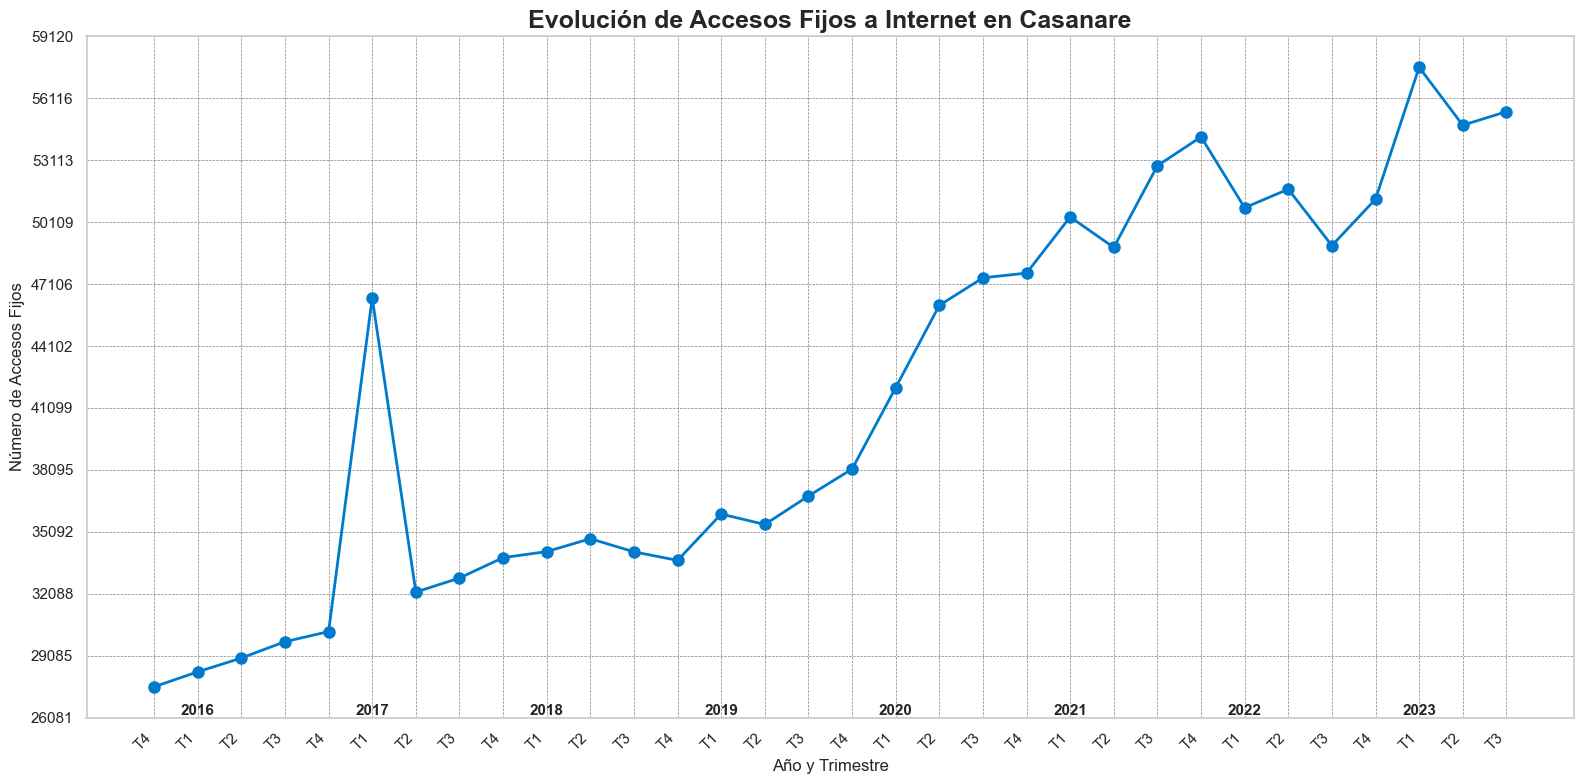

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter # Aunque no la usemos, la dejamos por si la necesitas luego

# --- 1. Carga y Preparación de Datos ---
sns.set_theme(style="whitegrid")
df = pd.read_csv('Internet_Fijo_Penetraci_n_Municipio_20250804.csv')
df['No. ACCESOS FIJOS A INTERNET'] = df['No. ACCESOS FIJOS A INTERNET'].astype(int)

# --- 2. Lógica de Filtrado y Agrupación ---
departamento_seleccionado = 'CASANARE'
df_dep = df[df['DEPARTAMENTO'].str.upper() == departamento_seleccionado.upper()].copy()
df_grouped = df_dep.groupby(['AÑO', 'TRIMESTRE'])['No. ACCESOS FIJOS A INTERNET'].sum().reset_index()
df_grouped.sort_values(by=['AÑO', 'TRIMESTRE'], inplace=True)

# --- 3. Lógica de Graficación ---
fig, ax = plt.subplots(figsize=(16, 8))
x = range(len(df_grouped))
y = df_grouped['No. ACCESOS FIJOS A INTERNET']
trimestres_labels = [f"T{t}" for t in df_grouped['TRIMESTRE']]
ax.plot(x, y, marker='o', linestyle='-', color='#007ACC', linewidth=2, markersize=8, label='No. de Accesos')

# --- 4. Personalización de Ejes y Títulos ---
ax.set_title(f'Evolución de Accesos Fijos a Internet en {departamento_seleccionado.title()}', fontsize=18, weight='bold')
ax.set_xlabel('Año y Trimestre', fontsize=12)
ax.set_ylabel('Número de Accesos Fijos', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(trimestres_labels, rotation=45, ha="right")

num_ticks_y = 12 
y_min, y_max = ax.get_ylim()
ax.set_yticks(np.linspace(y_min, y_max, num=num_ticks_y))

# LA LÍNEA DEL FORMATEADOR HA SIDO ELIMINADA DE AQUÍ

y_pos_anio = ax.get_ylim()[0]
for i, row in df_grouped.iterrows():
    if row['TRIMESTRE'] == 1:
        ax.text(i, y_pos_anio, row['AÑO'], ha='center', va='bottom', fontsize=11, weight='bold')

ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
fig.tight_layout()
plt.show()

## 2. Top 10 Departamentos por Índice de Penetración
Este gráfico de barras destaca los 10 departamentos con el mayor índice promedio de penetración, revelando los líderes regionales en conectividad.

C:\Users\Alejo\AppData\Local\Temp\ipykernel_33332\2730811867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_deptos.values, y=top_10_deptos.index, palette='viridis')


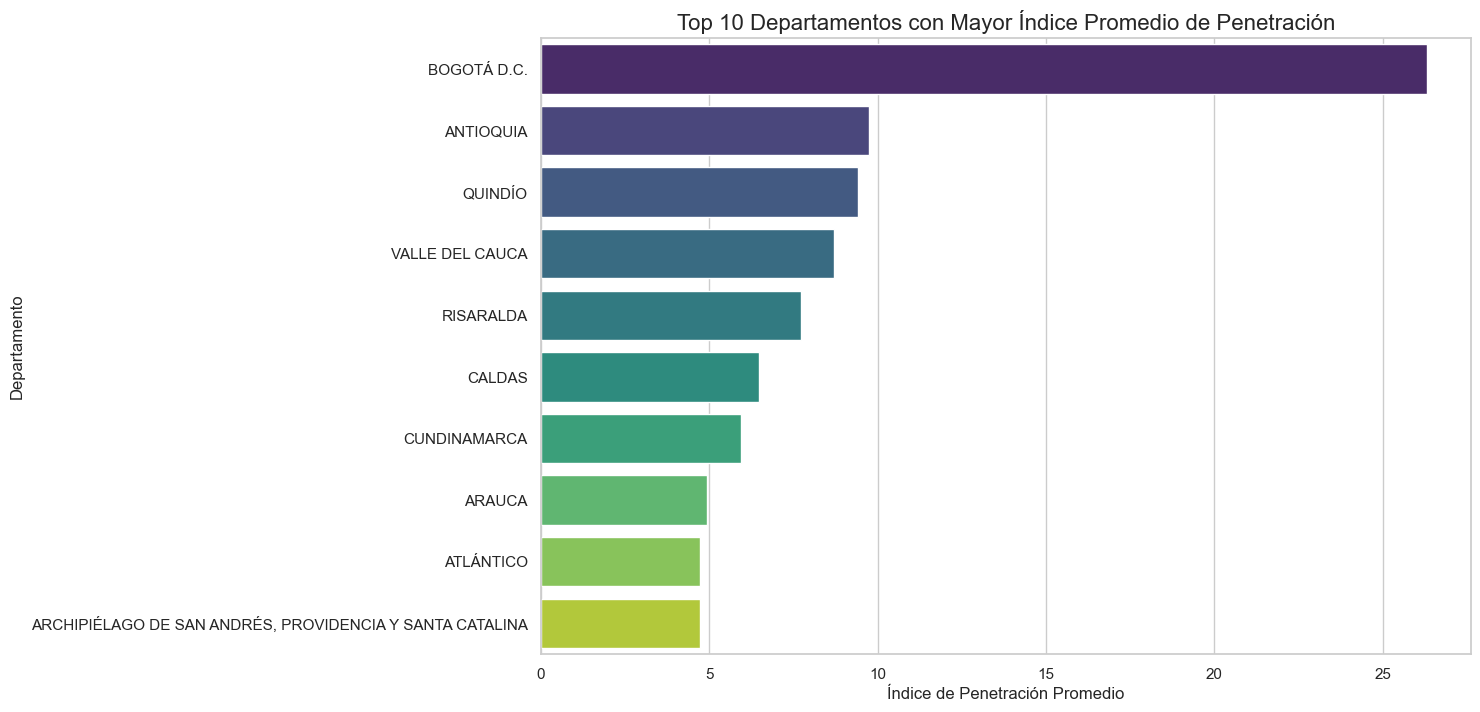

In [4]:
plt.figure(figsize=(12, 8))
top_10_deptos = df.groupby('DEPARTAMENTO')['INDICE'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_10_deptos.values, y=top_10_deptos.index, palette='viridis')
plt.title('Top 10 Departamentos con Mayor Índice Promedio de Penetración', fontsize=16)
plt.xlabel('Índice de Penetración Promedio')
plt.ylabel('Departamento')
plt.savefig('top_10_departamentos.png')

## 3. Distribución del Índice por Departamento (Top 5)
Los diagramas de caja (boxplots) son excelentes para visualizar la distribución y variabilidad de los datos. Aquí comparamos la distribución del índice de penetración para los 5 departamentos con la media más alta.

C:\Users\Alejo\AppData\Local\Temp\ipykernel_33332\3080574717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEPARTAMENTO', y='INDICE', data=df_top5, palette='plasma')


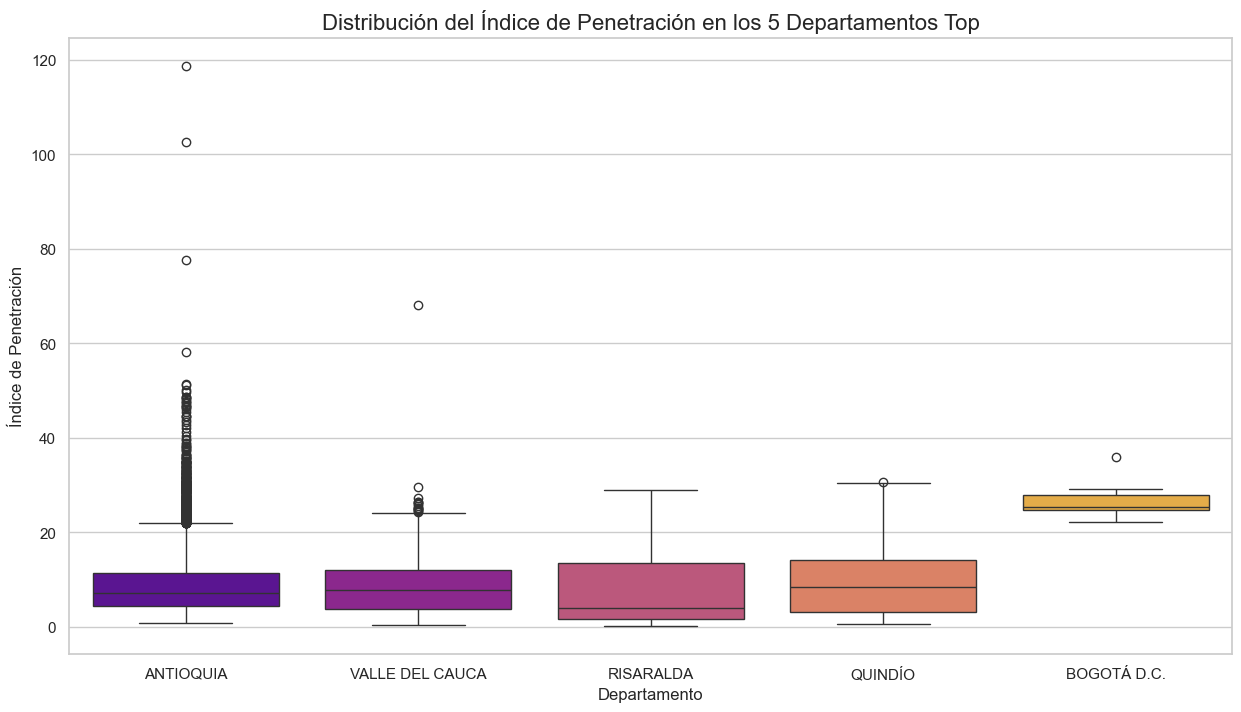

In [5]:
plt.figure(figsize=(15, 8))
top_5_depto_nombres = top_10_deptos.head(5).index
df_top5 = df[df['DEPARTAMENTO'].isin(top_5_depto_nombres)]
sns.boxplot(x='DEPARTAMENTO', y='INDICE', data=df_top5, palette='plasma')
plt.title('Distribución del Índice de Penetración en los 5 Departamentos Top', fontsize=16)
plt.xlabel('Departamento')
plt.ylabel('Índice de Penetración')
plt.savefig('distribucion_top5_deptos.png')